# Experiment 1 - Hello World

### Description
* **Dataset** : CloPeMa CTU 'Flat and Wrinkled' and 'Folded' combined. Validation subset randomly chosen with a probabilty of 30%.
(https://drive.google.com/file/d/0B8Z1YBnBij8sYmpZanJ2a2VaSGs/view?usp=sharing)
* **

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd


Using TensorFlow backend.


In [2]:
DATASET_PATH = '/home/danfergo/SIG/Code/Experiments/data/clopema'

In [3]:
train_datagen = ImageDataGenerator(
)

validation_datagen = ImageDataGenerator(
)


train_generator = train_datagen.flow_from_directory(
        DATASET_PATH + '/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='categorical',
        shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
        DATASET_PATH + '/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
)

Found 2366 images belonging to 9 classes.
Found 262 images belonging to 9 classes.


In [4]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('sigmoid'))

### Training

**Note:** the warning is appears, because the dataset size, 2366, is not divisible by 32. 

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [6]:
history = model.fit_generator(
        train_generator,
        samples_per_epoch=2336,
        nb_epoch=30,
        validation_data=validation_generator,
        nb_val_samples=256,
        verbose=2)

Epoch 1/30
9s - loss: 2.8785 - acc: 0.2072 - val_loss: 1.5761 - val_acc: 0.4922
Epoch 2/30


/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:1573: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


9s - loss: 1.3579 - acc: 0.5676 - val_loss: 0.8579 - val_acc: 0.8359
Epoch 3/30
8s - loss: 0.9995 - acc: 0.6779 - val_loss: 0.5893 - val_acc: 0.8984
Epoch 4/30
8s - loss: 0.7985 - acc: 0.7553 - val_loss: 0.3976 - val_acc: 0.8906
Epoch 5/30
8s - loss: 0.6382 - acc: 0.8081 - val_loss: 0.3109 - val_acc: 0.9258
Epoch 6/30
8s - loss: 0.5300 - acc: 0.8567 - val_loss: 0.1611 - val_acc: 0.9648
Epoch 7/30
8s - loss: 0.4073 - acc: 0.8880 - val_loss: 0.1502 - val_acc: 0.9727
Epoch 8/30
9s - loss: 0.3753 - acc: 0.8977 - val_loss: 0.1754 - val_acc: 0.9531
Epoch 9/30
8s - loss: 0.3168 - acc: 0.9197 - val_loss: 0.0893 - val_acc: 0.9733
Epoch 10/30
8s - loss: 0.2681 - acc: 0.9239 - val_loss: 0.0595 - val_acc: 0.9847
Epoch 11/30
8s - loss: 0.2759 - acc: 0.9243 - val_loss: 0.1263 - val_acc: 0.9656
Epoch 12/30
8s - loss: 0.2213 - acc: 0.9358 - val_loss: 0.0359 - val_acc: 0.9924
Epoch 13/30
8s - loss: 0.2111 - acc: 0.9408 - val_loss: 0.0399 - val_acc: 0.9771
Epoch 14/30
8s - loss: 0.1994 - acc: 0.9480 - v

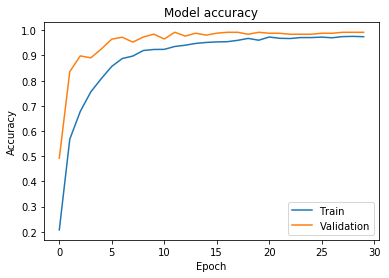

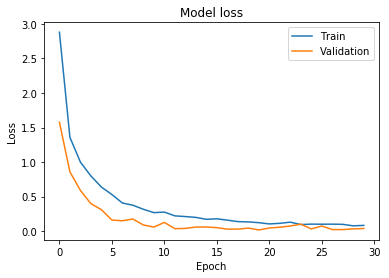

In [7]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


### Evaluation

In [8]:
test_datagen = ImageDataGenerator(
    # rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
        DATASET_PATH + '/validation',
        target_size=(150, 150),
        batch_size=256,
        class_mode='categorical'
)

Found 262 images belonging to 9 classes.


In [9]:
x_test, y_test = test_generator.next()

y_pred = model.predict_classes(x_test, batch_size=256)

256/256 [==============================] - 0s


In [10]:
class_indices = validation_generator.class_indices
sorted_class_indices = sorted(class_indices.items(), key=operator.itemgetter(1))
target_names = [x[0] for x in sorted_class_indices]

labels = range(0, len(target_names))
conf = confusion_matrix(np.argmax(y_test, axis=1), y_pred, labels)
pd.DataFrame(data = conf, index=target_names, columns=target_names)


,bluse,hoody,pants,polo,polo-long,skirt,towel,tshirt,tshirt-long
bluse,9,0,0,0,0,0,0,0,0
hoody,0,4,0,0,0,0,0,0,0
pants,0,0,121,0,0,0,0,0,0
polo,0,0,0,27,0,0,0,0,0
polo-long,0,0,0,0,14,0,0,0,0
skirt,0,0,0,0,0,6,0,0,0
towel,0,0,0,0,0,0,9,0,0
tshirt,0,0,0,0,0,0,0,35,0
tshirt-long,0,0,2,0,0,0,0,0,29


### Results

This experiment allowed to test the working pipeline – Keras over Tensorflow with CUDA support; the auxiliar libraries – NumPy, Sklearn and Matplotlib; the development tool – Jupyter Notebook.


Because the used dataset was collected under artificial conditions, namely constant ilumination and background, the obtained results are extremely positive.

Next experiments should encompass more complex datasets such as DeepFashion.


